<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Classification_with_TensorFlow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What we're going to cover

* Architecture of neural network classification model
* Input shapes and output shapes of a classification model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
> Creating a model, compiling a model, fitting a model, evaluating a model
* Different classification evaluation methods
* Saving and Loading models

### Let's Cook

Tensor -> [batch_size, width, height, color_channels] = [None/32, 224, 224, 3] (Shape of the tensor)

[A Recipe for Training Neural Network](https://karpathy.github.io/2019/04/25/recipe/) - Andrej Karpathy

### Introduction to neural network classification with TensorFlow

In this notebook we're going to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label": y})
circles.head(), circles.shape

(          x         y  label
 0  0.754246  0.231481      1
 1 -0.756159  0.153259      1
 2 -0.815392  0.173282      1
 3 -0.393731  0.692883      1
 4  0.442208 -0.896723      0,
 (1000, 3))

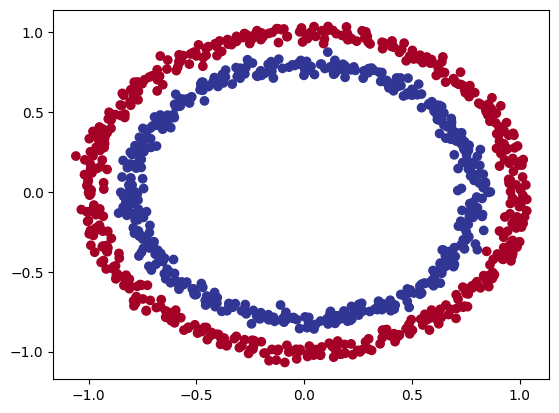

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(circles["x"], circles["y"], c=circles["label"], cmap=plt.cm.RdYlBu)

📑**Resources:** [Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35340&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Input and Output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples are we working with?
len(X), len(y)

(1000, 1000)

In [26]:
# View the first example of features and labels
X[42], y[42]

(array([-0.71424251, -0.67921777]), 0)

### Steps in modelling

1. Get the data ready
2. Build or pick a pretrained model (to suit your problem).
3. Fit the model to the data and make a prediction.
4. Evaluate the model
5. Improve through experimentation.

In [27]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the mdoel using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

# 4. Evaluate the model
model_1.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1614 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9351 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.5512 - accuracy: 0.5070
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.8424 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7616 - accuracy: 0.4640


[4.761646270751953, 0.46399998664855957]

In [28]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933091878890991, 0.5]

### Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we can add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we can choose different optimization function such as adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [30]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### Common ways to improve a deep learning model

- Adding Layers
- Increase the no. of hidden units.
- Change the activation functions.
- Change the optimization function.
- Change the learning rate.
- Fitting on more data.
- Fitting for longer.

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # Adding 100 neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 mroe neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5140


[0.6976454257965088, 0.5139999985694885]

In [32]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, Let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid (numPy) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)

In [33]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


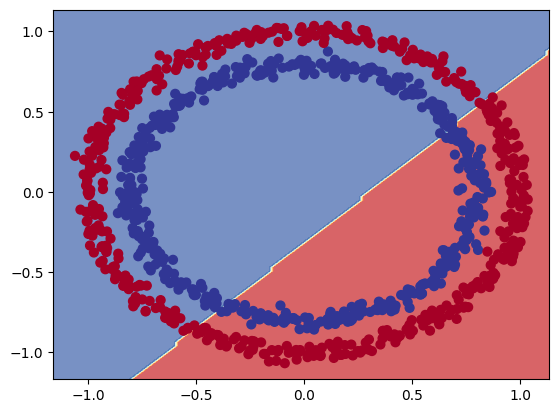

In [34]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [35]:
# ERROR!

# # Let's see if our model can be used for a regression problem...
# tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# # Evaluate our model on the test set
# model_3.evaluate(X_reg_test, y_reg_test)

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# Evaluate the model
model_4.evaluate(X_reg_test, y_reg_test)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 553.9412 - mae: 553.9412
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 453.0854 - mae: 453.0854
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 355.5061 - mae: 355.5061
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 253.5929 - mae: 253.5929
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 146.9454 - mae: 146.9454
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 52.5434 - mae: 52.5434
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 76.3945 - mae: 76.3945
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 75.3262 - mae: 75.3262
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 50.7208 - mae: 50.7208
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.4833 - mae: 49.4833
Epoch 11/100
5/5 [==============================]

[62.65933609008789, 62.65933609008789]

2/2 [==============================] - 0s 6ms/step


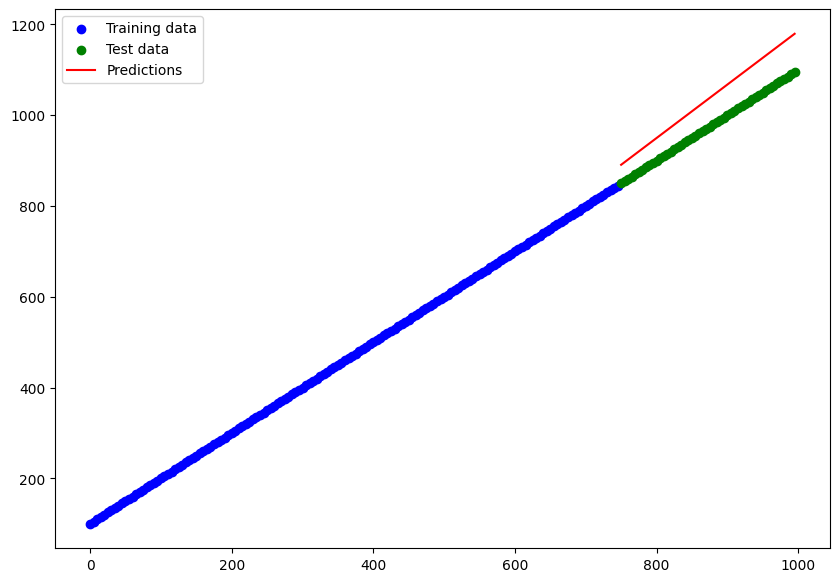

In [37]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, color='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.plot(X_reg_test, y_reg_preds, color='r', label='Predictions')
plt.legend();

### The missing piece: Non-linearity

### Let's try to build our first neural network with a non-linear activation function.

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 4. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5320
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5560
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.5360
Epoch 11/

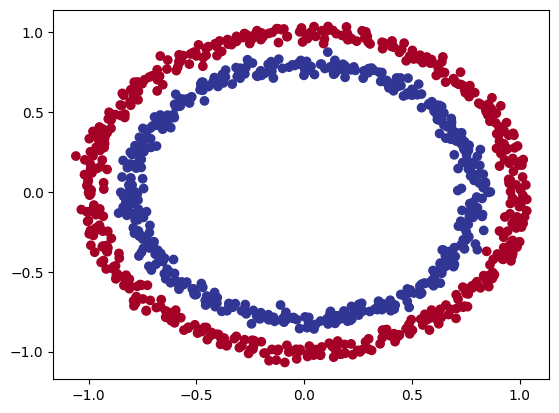

In [56]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


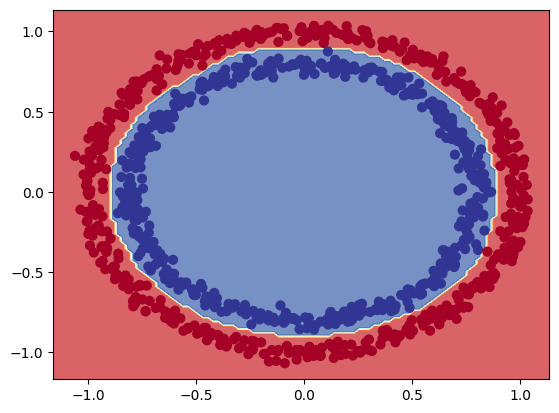

In [57]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)

In [58]:
# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000


[0.01213077176362276, 1.0]

🤔**Question:** What's wrong with predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn and what data did we predict on?


🔑**Note:** The combination of ***linear (straight lines) and non-linear (non-straight lines) functions*** is one of the key fundamentals of neural networks.


Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [59]:
# Create a toy tensor (Similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

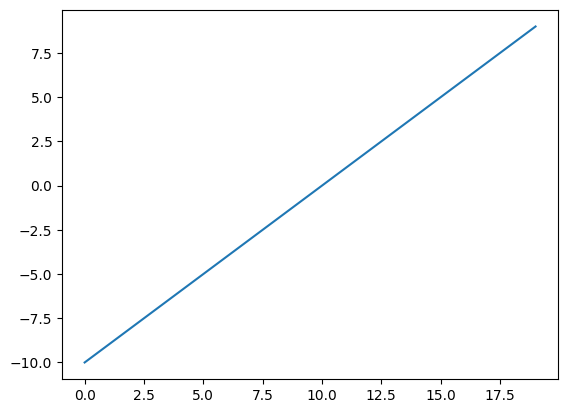

In [61]:
# Visualize our toy tensor
plt.plot(A)
plt.show()

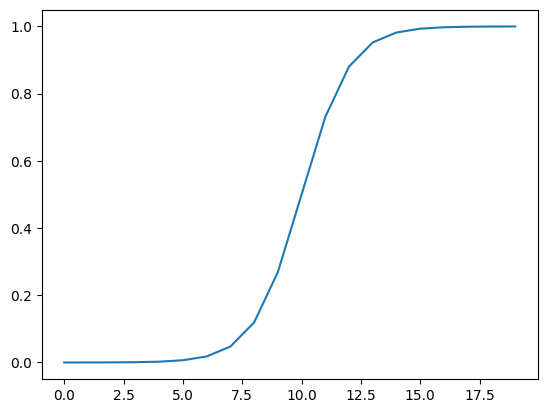

In [63]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Visualize sigmoid
plt.plot(sigmoid(A))
plt.show()

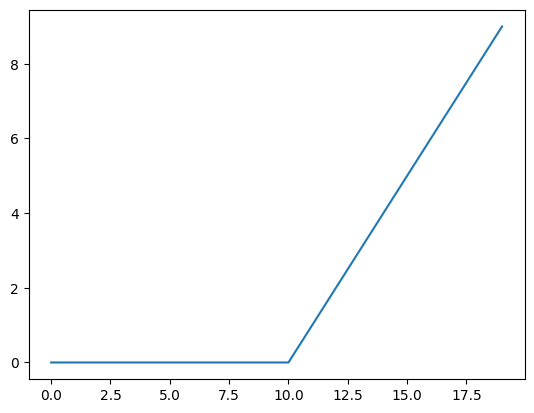

In [67]:
# Let's recreate reLU function
def reLU(x):
  return tf.maximum(x, 0)

# Visualize reLU
plt.plot(reLU(A))
plt.show()

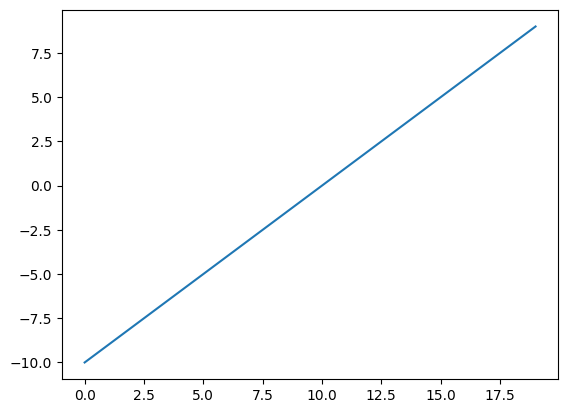

In [70]:
# Let's try the linear activation function
plt.plot(tf.keras.activations.linear(A));  # Visualize linear -> output unchanged => inp = out

### Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, In ML this is basically a sin.

So let's create a training and test set.

In [72]:
# Check how many examples we have
len(X)

1000

In [73]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [74]:
# Spli into train and test
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Check the shapes of our data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [75]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_5)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 3. Compile the model (same as model_5)
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 4. Fit the model (same as model_5)
history = model_6.fit(X_train, y_train, epochs=75, verbose=1)

Epoch 1/75
25/25 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6212
Epoch 3/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7050
Epoch 4/75
25/25 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.9187
Epoch 5/75
25/25 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.9538
Epoch 6/75
25/25 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9912
Epoch 7/75
25/25 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9987
Epoch 8/75
25/25 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 1.0000
Epoch 9/75
25/25 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9975
Epoch 10/75
25/25 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 11/75
25/25 [

In [76]:
# Evaluate the model on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000


[0.002629338763654232, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


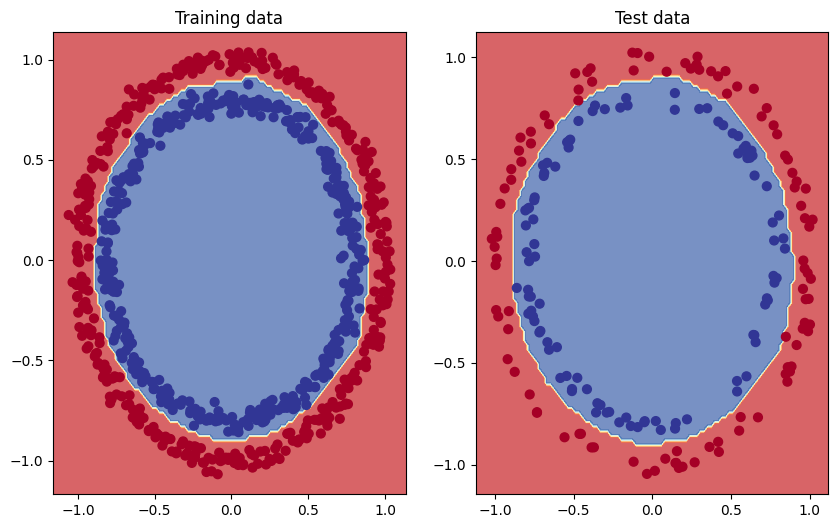

In [77]:
# Plot the decision boundary for the training and testing sets
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Training data')
plot_decision_boundary(model=model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model=model_6, X=X_test, y=y_test)

### Plot the loss (or training) curves

In [79]:
# Convert the history object into a DataFrame
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.692184,0.50000
1,0.667574,0.62125
2,0.621964,0.70500
3,0.507774,0.91875
4,0.355054,0.95375
...,...,...
70,0.000828,1.00000
71,0.000785,1.00000
72,0.000764,1.00000
73,0.000628,1.00000


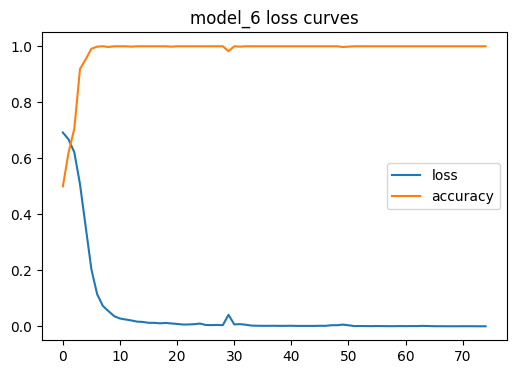

In [82]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.title('model_6 loss curves');

🔑**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [83]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as the above)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_7 = model_7.fit(X_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7292 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7170 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

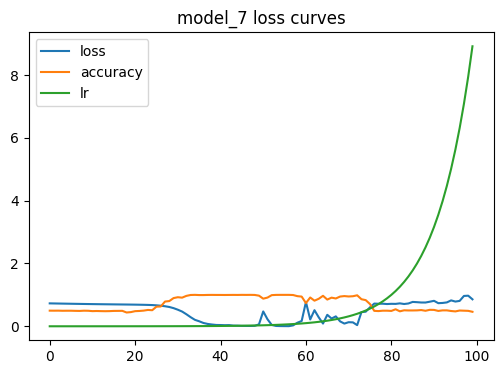

In [84]:
# Checkout the history
pd.DataFrame(history_7.history).plot(figsize=(6, 4))
plt.title('model_7 loss curves');

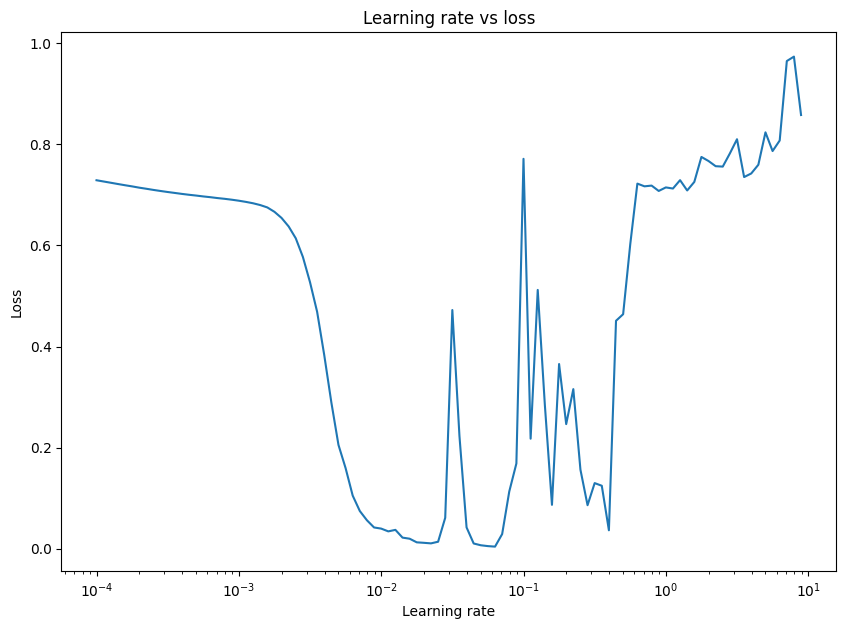

In [89]:
# Plot the learning_rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_7.history["loss"])
plt.title("Learning rate vs loss");
plt.xlabel("Learning rate");
plt.ylabel("Loss");

In [90]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [92]:
# Let's try using a higher *ideal* learning rate with the same model

# Set the random seed
tf.random.set_seed(42)

# Create a model (same as the above)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with ideal learning rate
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # learning_rate used before -> 0.01
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.5813
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6450
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8675
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9563
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9925
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9937
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9975
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9987
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9950
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 11/50
25/25 [

In [93]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000


[0.004089174326509237, 1.0]

In [94]:
# Evaluate model_7 on the test dataset
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934701800346375, 0.4950000047683716]

In [95]:
# Evaluate model_6 on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000


[0.002629338763654232, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


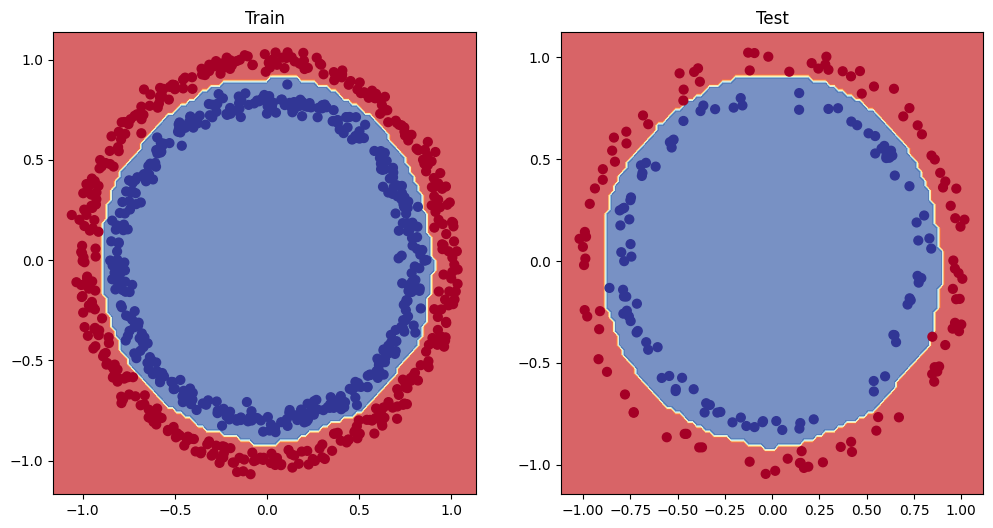

In [96]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_8, X=X_test, y=y_test);